Como primer ejercicio del módulo, vamos a desarrollar un modelo capaz de **predecir si mañana lloverá en Australia o No**.

In [1]:
from IPython.display import Image
Image(url='https://images.fineartamerica.com/images/artworkimages/mediumlarge/2/1-kangaroo-jumping-in-rain-barry-kearney.jpg')  

## Importación de librerías 

En primer lugar, debemos importar las 4 librerías básicas utilizadas en Machine Learning: 
1. **Numpy**: soporte para vectores y matrices (numpy Arrays), sobre el que se apoya pandas
2. **Pandas**: soporte para Series y DataFrames y funciones de análisis de datos
3. **Matplotlib**: librería de gráficos sobre la que se apoya Seaborn y las funciones de visualización de pandas
4. **Seaborn**: librería de *easy ploting*

Aprovecharemos también para gestionar la visualización en linea (*%matplotlib inline*), los estilos gráficos (*plot style: ggplot*) y la visualización de pandas (*max_rows* y *format*).

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

También cargaremos todas las funciones de preprocesamientoo de scikit-learn, contenidas en el **scikit preprocessing**.

In [3]:
from sklearn import preprocessing

Y aprovecharemos para comprobar la **versión instalada de scikit-learn**.

In [4]:
from sklearn import __version__ as sklearn_version
print('La versión instalada de scikit-learn es {}.'.format(sklearn_version))

La versión instalada de scikit-learn es 0.21.3.


## Importación de datos 

Antes de empezar a repasar la Machine Learning Checklist, importatemos el DataSet de trabajo (**WeatherAUS**). Este Dataset se encuentra publicado en Kaggle, aunque para facilitar el trabajo lo hemos trasladado a un link de descarga en internet (repositorio público en GitHub, con enlace corte vía bit.ly.).

In [5]:
data_dir = 'https://bit.ly/3bAovNm'

Recordad que para consultar cualquier método, en Jupyter podemos utilizar los accesores "?" y "??", que muestran en una nueva ventana la documentación que haya escrita y el código cuando éste no es privado.

In [6]:
pd.read_csv?

In [7]:
df = pd.read_csv(data_dir)

Ahora que tenemos los datos cargados, es el momento de empezar el análisis exploratorio.

## MLC2: Data Understanding

### MLC2.1: Análisis Univariante de datos

#### 1. Tamaño del dataset

Al introducir en un DataFrame los datos del csv, disponemos de todos los métodos y funciones disponibles en este tipo de objetos, que incluyen estadísticos descriptivos, funciones de visualización y otras. Podéis consultar todos los métodos (funciones) y atributos (parámetros) dispnibles en el objeto DataFrame en https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html. \
En concreto, podemos utilizar el método **df.info()** para consultar la información básica del dataset.

In [8]:
df.info?

In [9]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Columns: 24 entries, Date to RainTomorrow
dtypes: float64(17), object(7)
memory usage: 26.0+ MB


#### 2. Visualización directa de los datos

Igualmente, podemos consultar directamente los datos de la cabecera con **head()** o la cola con **tail()**.\
Como recomendación personal, es mejor visualizar los datos transpuestos, mediante el modificador **.T**.

In [10]:
df.head(4).T

,0,1,2,3
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04
Location,Albury,Albury,Albury,Albury
MinTemp,13.40,7.40,12.90,9.20
MaxTemp,22.90,25.10,25.70,28.00
Rainfall,0.60,0.00,0.00,0.00
Evaporation,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE
WindGustSpeed,44.00,44.00,46.00,24.00
WindDir9am,W,NNW,W,SE


Un aspecto importante en el trabajo con datos es comprender la integridad del índice DataFrame. En este caso, cada registro corresponde a un día en una Localización. A este par (**Date-Location**) le llamaremos índice, y podemos explicitarlo en el Dataframe o no. 

A continuación se incluye la descripción de las variables, obtenida de la página del dataset en Kaggle (https://www.kaggle.com/jsphyg/weather-dataset-rattle-package): 
* **Date**: The date of observation
* **Location**: The common name of the location of the weather station
* **MinTemp**: The minimum temperature in degrees celsius
* **MaxTemp**: The maximum temperature in degrees celsius
* **Rainfall**: The amount of rainfall recorded for the day in mm
* **Evaporation**: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
* **Sunshine**: The number of hours of bright sunshine in the day.
* **WindGustDir**: The direction of the strongest wind gust in the 24 hours to midnight
* **WindGustSpeed**: The speed (km/h) of the strongest wind gust in the 24 hours to midnight
* ****WindDir9am**: Direction of the wind at 9am
* **WindDir3p**: Direction of the wind at 3pm
* **WindSpeed9am**: Wind speed (km/hr) averaged over 10 minutes prior to 9am
* **WindSpeed3pm**: Wind speed (km/hr) averaged over 10 minutes prior to 3pm
* **Humidity9a**: Humidity (percent) at 9am
* **Humidity3pm**: Humidity (percent) at 3pm
* **Pressure9am**: Atmospheric pressure (hpa) reduced to mean sea level at 9am
* **Pressure3pm**: Atmospheric pressure (hpa) reduced to mean sea level at 3pm
* **Cloud9am**: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
* **Cloud3pm**: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
* **Temp9am**: Temperature (degrees C) at 9am
* **Temp3pm**: Temperature (degrees C) at 3pm
* **RainToday**: Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
* **RISK_MM**: The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk". Will be left out in the model.


Como veis, en la descripción de las variables se indiica que para realizar un modelo de clasificación es necesario borrar la variable **RISK_MM** (cantidad de lluvia del día siguiente en MM). Esta información pertenece al futuro, y no estará disponible en el momento de realizar la predicción. De hecho, contiene información clara sobre el valor del target. A los modelos obtenidos cuando incorporamso este tipo de variables se les denomina *modelos autoexplicativos*, y se caracterizan por tener una capacidad predictiva elevada en entrenamiento y una capacidad predictiva real casi nula.

In [11]:
df.drop?

Al utilizar el método drop, es imporotante tener controlados 2 parámetros: 
1. **axis**: eje en el que debe buscar la variable que pasamos a eliminar (0 filas, 1 columnas). 
2. **inplace**: parámetro que indica si la variable debe eliminarse directamente. En caso de no especificar *inplace=1*, la aplicación del método imprimirá en pantalla un DataFrame sin esa variable, pero no realizará el borrado (puede utilizarse para asignar a un nuevo DataFrame la versión sin esa variable manteniendo el original). 


In [12]:
df.drop('RISK_MM', axis=1, inplace=True)

In [13]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Columns: 23 entries, Date to RainTomorrow
dtypes: float64(16), object(7)
memory usage: 25.0+ MB


#### 3. Tipo de atributos disponibles

Un aspecto importante es tener controlado el tipo de atributos de nuestro dataframe (numéricos / categóricos).Esto se puede hacer mediante el método info(), especificando el parámetro *verbose = True* (versión larga del método). 

In [14]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

#### 4. Estadísticos descriptivos

Una de las maneras más sencillas de comprender los atributos del DataFrame es el método **describe()**, que nos proporciona estadísticos representativos de cada uno de los atributos del DataFrame.

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,"141,556.00",12.19,6.40,-8.50,7.60,12.00,16.80,33.90
MaxTemp,"141,871.00",23.23,7.12,-4.80,17.90,22.60,28.20,48.10
Rainfall,"140,787.00",2.35,8.47,0.00,0.00,0.00,0.80,371.00
Evaporation,"81,350.00",5.47,4.19,0.00,2.60,4.80,7.40,145.00
Sunshine,"74,377.00",7.62,3.78,0.00,4.90,8.50,10.60,14.50
WindGustSpeed,"132,923.00",39.98,13.59,6.00,31.00,39.00,48.00,135.00
WindSpeed9am,"140,845.00",14.00,8.89,0.00,7.00,13.00,19.00,130.00
WindSpeed3pm,"139,563.00",18.64,8.80,0.00,13.00,19.00,24.00,87.00
Humidity9am,"140,419.00",68.84,19.05,0.00,57.00,70.00,83.00,100.00
Humidity3pm,"138,583.00",51.48,20.80,0.00,37.00,52.00,66.00,100.00


Por defecto, cuando hay variables numéricas y categóricas, este método sólo describe las variables numéricas. Sin embargo, podemos modificarlo para mostrar también las variables categóricas.

In [16]:
df.describe(include=['object']).T

,count,unique,top,freq
Date,142193,3436,2014-11-19,49
Location,142193,49,Canberra,3418
WindGustDir,132863,16,W,9780
WindDir9am,132180,16,N,11393
WindDir3pm,138415,16,SE,10663
RainToday,140787,2,No,109332
RainTomorrow,142193,2,No,110316


Es bueno recordad que los DataFrames permiten la selección de parámetros mediante el método **select_dtypes()**. Si seleccionamos los atributos de tipo categórico e invocamos al método describe(), obtenemos el mismo resultado.

In [17]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
Date,142193,3436,2014-11-19,49
Location,142193,49,Canberra,3418
WindGustDir,132863,16,W,9780
WindDir9am,132180,16,N,11393
WindDir3pm,138415,16,SE,10663
RainToday,140787,2,No,109332
RainTomorrow,142193,2,No,110316


#### 5. Número de valores nulos

Aunque en el método describe se pueden saber las variables que contienen valores nulos (resultados - count), pandas dispone del método **isnull()**, que genera una matriz indicando los valores nulos, sobre la que podemos aplicar el método sum para sumarlos y conocer el total. 

Es importante, siempre que podamos, trabajar por separado los atributos numéricos y categóricos para mantener una visión clara. 

In [18]:
df.select_dtypes(include='number').isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64

In [19]:
df.select_dtypes(include='object').isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

#### 6. Distribución de los valores del target

En los problemas de clasificación supervisada, uno de los aspectos clave a conocer es la distribución del target. En caso de un target categórico, debemos saber el valor y número de registros en cada categoría. Para esto, las Series de pandas disponen del método **value_counts()**.

In [20]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

Aquí es importante recordar que, a partir de un DataFrame, se pueden generar Series o DataFrames con el claudátor simple o doble. Por ejemplo: 

In [21]:
print('Esto es un DataFrame')
print(type(df[['RainTomorrow']]))
df[['RainTomorrow']].head()

Esto es un DataFrame
<class 'pandas.core.frame.DataFrame'>


,RainTomorrow
0,No
1,No
2,No
3,No
4,No


In [22]:
print('Esto es una Serie')
print(type(df['RainTomorrow']))
df['RainTomorrow'].head()

Esto es una Serie
<class 'pandas.core.series.Series'>


0    No
1    No
2    No
3    No
4    No
Name: RainTomorrow, dtype: object

Es importante conocer el tipo de datos con el que estamos trabajando, pues cada tipo de datos dispone de unos métodos determinados. El método value_counts, por ejemplo, sólo está disponible en las Series. 

Al llamar a value_counts, es importante usar el parámetro **dropna = False** para ver si hay valores nulos (en caso de que no lo hayamos hecho antes).

In [23]:
df['RainTomorrow'].value_counts(dropna=False)

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

Asimismo, podemos utilizar el *easy plot* de Seaborn para obtener una visualización sencilla. 

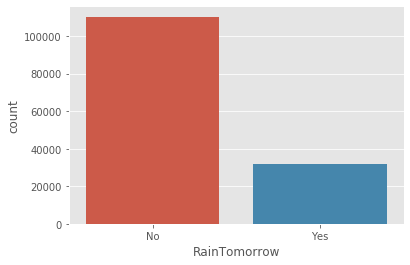

In [24]:
sns.countplot(data=df, x='RainTomorrow')

Vemos que el target contiene 2 valores en formato texto (string): 
- RainToomorrow = Yes
- RainToomorrow = No 

Es aconsejable convertir el valor del target en una variable 0/1, para poder hacer agregaciones como las que veremos a continuación. 

Para realizar la conversión, es posible utilizar el operador de evaluación. En Python, cualquier cosa que incluyamos entre paréntesis **()** será evaluada, por lo que podemos incluir dentro de un paréntesis la evaluación de una igualdad (recordad, doble igual **==**) de manera que el paréntesis lo evalúe.\
Cuando la evaluación sea cierta, generará un valor booleano True, cuando no lo sea, generará un False.\
Al aplicar el método astype(int) al resultado de la evaluación, forzará la conversión **True->1** y **False->0**.

In [25]:
df['RainTomorrow'] = (df['RainTomorrow'] == 'Yes').astype(int)

In [26]:
df[['RainTomorrow']].head()

,RainTomorrow
0,0
1,0
2,0
3,0
4,0


Como hemos comentado, el disponer de la clase en formato numérico nos permite hacer alguna operaciones interesantes.

Al hacer un **count** sobre la Serie de la clase, obtenemos el número total de valores (número de registros del DataFrame). 

In [27]:
df['RainTomorrow'].count()

142193

Con **sum**, obtenemos la suma. Como los negativos son 0 y los positivos 1, tendremos como resultado el número de ejemplos positivos.  

In [28]:
df['RainTomorrow'].sum()

31877

Igualmente, con **mean** obtendremos el número total de registros con 1 sobre el total, es decir, la ratio de prevalencia de la clase positiva.

In [29]:
df['RainTomorrow'].mean()

0.22418121848473554

#### 7 a 9. Distribución de variables y correlación con el target

Vamos a empezar la exploración de algunas variables. Con ello, haremos un repaso de métodos de pandas, matplotlib y seaborn. 

#### Exploramos MinTemp y MaxTemp

Vamos a generar una muestra sobre el DataFrame original con los registros de Canberra, usando el **boolean indexing** (nos quedamos con registros que cumplan la coondición indicada).

In [30]:
canberra_df = df[df['Location']=='Canberra']
canberra_df.set_index('Date', inplace=True)

In [31]:
pd.DataFrame.plot?

In [32]:
canberra_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 3418 entries, 2007-11-01 to 2017-06-25
Columns: 22 entries, Location to RainTomorrow
dtypes: float64(16), int64(1), object(5)
memory usage: 614.2+ KB


Con este DataFrame reducido, podemos generar gráficos a partir del método **plot()** de las Series, accediendo con el claudátor simple. 

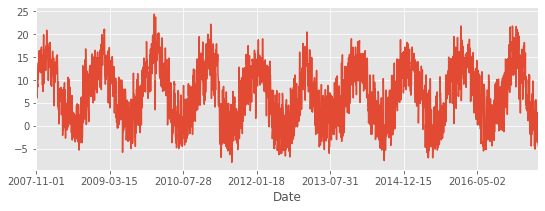

In [33]:
plt.figure(figsize=[9,3])
canberra_df['MinTemp'].plot()

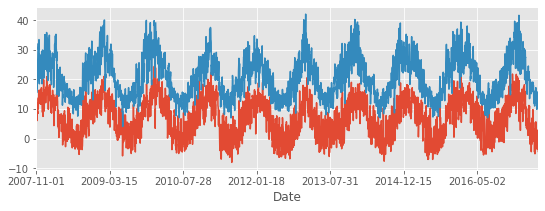

In [34]:
plt.figure(figsize=[9,3])
canberra_df['MinTemp'].plot()
canberra_df['MaxTemp'].plot()

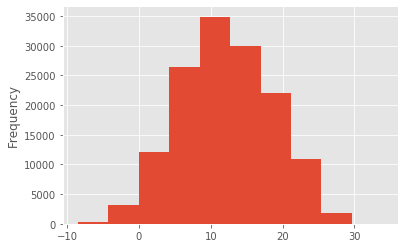

In [35]:
df['MinTemp'].plot(kind='hist')

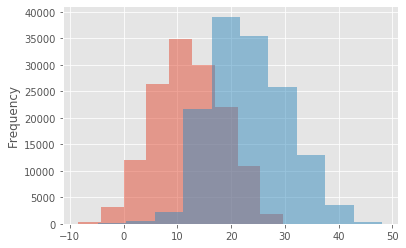

In [36]:
df['MinTemp'].plot(kind='hist', alpha=.5)
df['MaxTemp'].plot(kind='hist', alpha=.5)

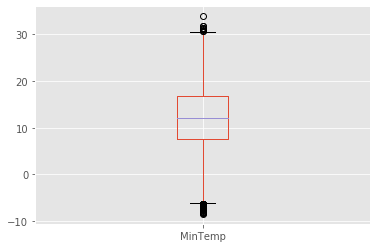

In [37]:
df['MinTemp'].plot(kind='box')

Como alternativa, podemos utilizar los métodos de seaborn, que nos permiten además mostrar de una manera muy sencilla gráficos combinados con varias variables. 

In [38]:
sns.boxplot?

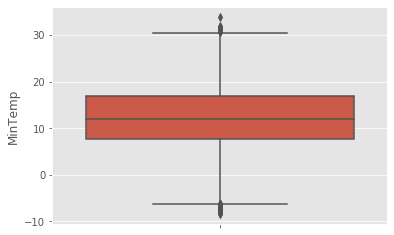

In [39]:
sns.boxplot(data=df, y='MinTemp')

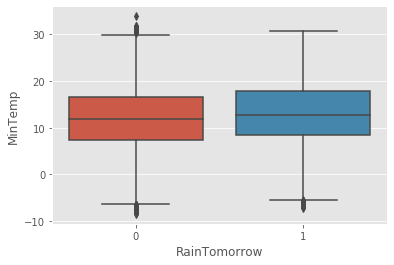

In [40]:
sns.boxplot(data=df, x='RainTomorrow', y='MinTemp')

#### Variable 2: Rainfall

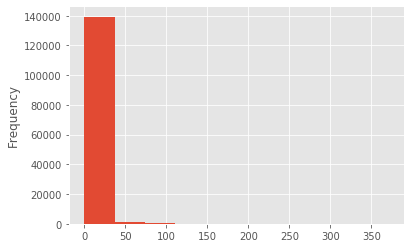

In [41]:
df['Rainfall'].plot(kind='hist')

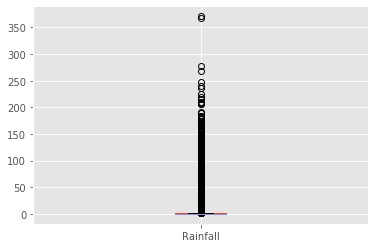

In [42]:
df['Rainfall'].plot(kind='box')

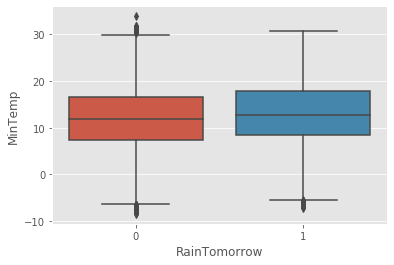

In [43]:
sns.boxplot(data=df, x='RainTomorrow', y='MinTemp')

Dentro de la mayoría de métodos de seaborn, el parámetro hue nos permite hacer un split por las categorías de esa variable (importante que sea categórica) para comparar distribuciones. 

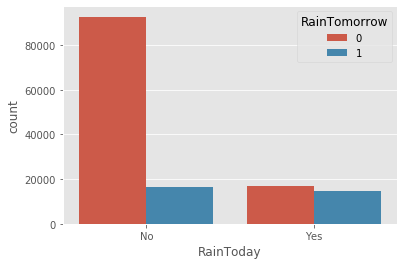

In [44]:
sns.countplot(data=df, x='RainToday', hue='RainTomorrow')

In [45]:
sns.countplot?

En ocasiones, sin embargo, la visualización directa mediante tablas (con un crosstab de series, por ejemplo) es una manera sencilla de ver resultados.

In [46]:
pd.crosstab(df['RainToday'], df['RainTomorrow'])

RainTomorrow,0,1
RainToday,,
No,92728,16604
Yes,16858,14597


#### Wind Direction

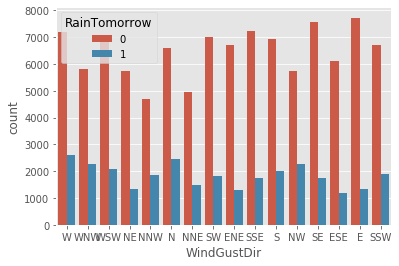

In [47]:
sns.countplot(data=df, x='WindGustDir', hue='RainTomorrow')

Igualmente, podemos utilizar el método **pivot_table** del DataFrame para ver resultados agregados, utilizando los métodos de agregación sobre la clase vistos anteriormente. 

In [48]:
df.pivot_table(index='WindGustDir', values='RainTomorrow', aggfunc=[len, sum, np.mean])

,len,sum,mean
,RainTomorrow,RainTomorrow,RainTomorrow
WindGustDir,,,
E,9071,1350,0.15
ENE,7992,1288,0.16
ESE,7305,1200,0.16
N,9033,2452,0.27
NE,7060,1319,0.19
NNE,6433,1481,0.23
NNW,6561,1863,0.28
NW,8003,2284,0.29


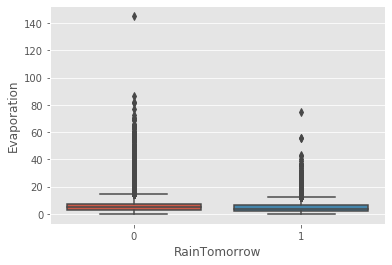

In [49]:
sns.boxplot(data=df, x='RainTomorrow', y='Evaporation')

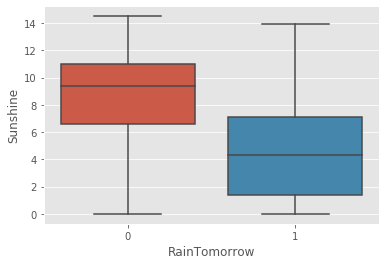

In [50]:
sns.boxplot(data=df, x='RainTomorrow', y='Sunshine')

Podéis seguir explorando las variables de manera univariante o multivariante cogiendo ejemplo de los muchos NoteBooks disponibles en Kaggle, como por ejemplo este NoteBook de Titanic: https://www.kaggle.com/ash316/eda-to-prediction-dietanic

## MLC3: Data Preparation

### MLC3.1: Limpieza de atributos

#### Imputación de nulos en categóricas

El primer paso a realizar en cuanto a preparación de atributos es la Limpieza de nulos. Para ello, vamos a observar la cantidad de nulos que tenemos en variables numéricas y categóricas.

In [51]:
df.select_dtypes(include='object').isnull().sum()

Date               0
Location           0
WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64

Podéis ver que la variable RainToday tiene 1406 nulos. Podemos ver la distribución de esta variable mediante value_counts. 

In [52]:
df['RainToday'].value_counts(dropna=False)

No     109332
Yes     31455
NaN      1406
Name: RainToday, dtype: int64

In [53]:
pd.DataFrame.fillna?

El método **fillna()** de pandas (para Series o DataFrames) permite llenar los nulos con valores específicos.\
Es importante, cuando utilicemos este método, recordar el parámetro inplace. 

En este caso, y para mantener la simplicidad, vamos a llenarcon el valor más probable (No).

In [54]:
df['RainToday'].fillna(value='No', inplace=True)

In [55]:
df.select_dtypes(include='object').isnull().sum()

Date               0
Location           0
WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday          0
dtype: int64

Vemos que quedan 3 variables con valores nulos. Como tenemos previsto hacer One-Hot-Encoding con estas, no gestionaremos estos nulos (así luego no tendrán columna). 

#### Imputación de nulos en numéricas

In [56]:
df.select_dtypes(include='number').isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainTomorrow         0
dtype: int64

En las variables numéricas, podemos decidir rellenar los valores nulos con cualquier valor: 
1. Valores concretos
2. Valores medios o medianas (fillna lo soporta)

O bien podemos eliminar los registros que los contienen. En este caso, elegiremos un valor extremo, dado que vamos a trabajar con árboles. 

In [57]:
df.fillna(value=-999, inplace=True)

Y podemos visualizar el DataFrame resultante.

In [58]:
df.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.40,7.40,12.90,9.20,17.50
MaxTemp,22.90,25.10,25.70,28.00,32.30
Rainfall,0.60,0.00,0.00,0.00,1.00
Evaporation,-999.00,-999.00,-999.00,-999.00,-999.00
Sunshine,-999.00,-999.00,-999.00,-999.00,-999.00
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44.00,44.00,46.00,24.00,41.00
WindDir9am,W,NNW,W,SE,ENE


#### Eliminación de atributos de baja varianza

En este caso, no hay atributos de baja varianza, por lo que nos saltaremos este paso. 

#### Variables de fecha

Vamos a convertir la variable Date en una fecha y obtener algunos nuevos atributos más fáciles de tratar en el modelo, como el número de mes o de año. 

In [59]:
df['Date'] = pd.to_datetime(df['Date'])
df['Season'] = df['Date'].dt.quarter
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [60]:
df.drop('Date', inplace=True, axis=1)

In [61]:
df['Season'].head()

0    4
1    4
2    4
3    4
4    4
Name: Season, dtype: int64

In [62]:
df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [63]:
df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

#### Variables categóricas

En cuanto a las variables categóricas, vamos a convertir la variable RainToday a una numérica 0/1 y vamos a hacer one-hot-encoding sobre el resto. 

In [64]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
Location,142193,49,Canberra,3418
WindGustDir,142193,17,W,9780
WindDir9am,142193,17,N,11393
WindDir3pm,142193,17,SE,10663
RainToday,142193,2,No,110738


In [65]:
df['RainToday'].value_counts(dropna=False)

No     110738
Yes     31455
Name: RainToday, dtype: int64

In [66]:
df['RainToday'] = (df['RainToday']=='Yes').astype(int)
# Ojo, nos va a poner a 0 los días de No lluvia

In [67]:
# df['RainToday']

In [68]:
df['RainToday'] = (df['RainToday']=='Yes').astype(int)

/Users/juan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


#### One-hot-encoding for WindGustDir

In [69]:
_dummy_dataset = pd.get_dummies(df['WindGustDir'], prefix='WindGustDir')

In [70]:
df = pd.concat([df,_dummy_dataset],axis=1)

In [71]:
df.drop(['WindGustDir'],axis=1, inplace=True)

#### One-hot-encoding for WindDir9am

In [72]:
_dummy_dataset = pd.get_dummies(df['WindDir9am'], prefix='WindDir9am')

In [73]:
df = pd.concat([df,_dummy_dataset],axis=1)

In [74]:
df.drop(['WindDir9am'],axis=1, inplace=True)

#### One-hot-encoding for WindDir3am

In [75]:
_dummy_dataset = pd.get_dummies(df['WindDir3pm'], prefix='WindDir3pm')

In [76]:
df = pd.concat([df,_dummy_dataset],axis=1)

In [77]:
df.drop(['WindDir3pm'],axis=1, inplace=True)

#### Location

In [78]:
_dummy_dataset = pd.get_dummies(df['Location'], prefix='Location')

In [79]:
df = pd.concat([df,_dummy_dataset],axis=1)

In [80]:
df.drop(['Location'],axis=1, inplace=True)

#### Resultado

Finalmente, visualizaremos el DataFrame resultante.

In [81]:
df.head().T

,0,1,2,3,4
MinTemp,13.40,7.40,12.90,9.20,17.50
MaxTemp,22.90,25.10,25.70,28.00,32.30
Rainfall,0.60,0.00,0.00,0.00,1.00
Evaporation,-999.00,-999.00,-999.00,-999.00,-999.00
Sunshine,-999.00,-999.00,-999.00,-999.00,-999.00
WindGustSpeed,44.00,44.00,46.00,24.00,41.00
WindSpeed9am,20.00,4.00,19.00,11.00,7.00
WindSpeed3pm,24.00,22.00,26.00,9.00,20.00
Humidity9am,71.00,44.00,38.00,45.00,82.00
Humidity3pm,22.00,25.00,30.00,16.00,33.00


In [82]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Columns: 121 entries, MinTemp to Location_Woomera
dtypes: float64(16), int64(5), uint8(100)
memory usage: 36.3 MB


## MLC4. Modelling

En este punto iniciamos con la fase de modelización, que ocupa los pasos de generación de la estrategia de validación, el entrenamiento del modelo y el desarrollo de predicciones y la validación de éstas. 

### MLC4.1: Train / Test Split

En primer lugar, importaremos los scikits de estrategias de validación y selección de modelos **model_selection** y métricas de validación **metrics**. 

In [83]:
from sklearn import model_selection # model assesment and model selection strategies
from sklearn import metrics # model evaluation metrics

Podemos analizar los métodos disponibles con "??"

In [84]:
model_selection??

Y vemos que disponemos de métodos para el random holdout (**train_test_split**) y k-fold (**KFold**), además de otras aproximaciones como el LeaveOneOut u otros. 

#### Generación de la partición de validación 

Como hemos comentado, este dataset está particinado temporalmente, de manera que tenemos un registro por fecha y localización. En este tipo de casos, es adecuado guardar las particiones más recientes para hacer la validación del modelo, contrastando que nuestro modelo tiene capacidad de generalización hacia delante; aunque es de esperar que el patrón de comportamiento del clima no tenga grandes variaciones en medida "año", es una buena práctica que se recomienda mantener y que será muy relevante en casos en los que el comportamiento a predecir evolucione en períodos breves de tiempo. 

Para ello, vamos a ver cuántos registros tenemos de cada año, y con esto estableceremos qué particiones queremos utilizar para validación.

In [85]:
df['Year'].value_counts()

2016    17508
2014    17400
2015    17231
2009    16595
2010    16419
2013    16097
2011    15126
2012    15044
2017     8466
2008     2246
2007       61
Name: Year, dtype: int64

De manera complementaria, podemos analizar la tasa en cada partición

In [86]:
df.pivot_table(index='Year', values='RainTomorrow', aggfunc=[len, sum, np.mean])

,len,sum,mean
,RainTomorrow,RainTomorrow,RainTomorrow
Year,,,
2007,61,19,0.31
2008,2246,511,0.23
2009,16595,3607,0.22
2010,16419,3997,0.24
2011,15126,3738,0.25
2012,15044,3389,0.23
2013,16097,3465,0.22
2014,17400,3557,0.20


Para este caso, podemos por ejemplo validar con 2017 (hay suficientes éxitos), y utilizar el resto de datos (2007 a  2016) para realizar el entrenamiento del modelo (train y test). Para seleccionarlo, utilizaremos de nuevo el boolean indexing. 

In [87]:
dev_df = df[df['Year'] != 2016] # development = train + test
val_df = df[df['Year'] == 2016] # validation

Una vez realizada la selección de particiones, vamos a asignar los atributos y el target a las variables X e y, respectivamente.\
Para seleccionar, utilizaremos el método Drop sin el atributo inplace y haciendo asignación y la indexación directa (ojo con el doble claudator, usaremos un DataFrame... si usasemos el claudator simple sacaríamos una Serie).

In [88]:
dev_df_X = dev_df.drop('RainTomorrow', axis=1)
dev_df_y = dev_df[['RainTomorrow']]

In [89]:
val_df_X = val_df.drop('RainTomorrow', axis=1)
val_df_y = val_df[['RainTomorrow']]

In [90]:
dev_df_X.head().T

,0,1,2,3,4
MinTemp,13.40,7.40,12.90,9.20,17.50
MaxTemp,22.90,25.10,25.70,28.00,32.30
Rainfall,0.60,0.00,0.00,0.00,1.00
Evaporation,-999.00,-999.00,-999.00,-999.00,-999.00
Sunshine,-999.00,-999.00,-999.00,-999.00,-999.00
WindGustSpeed,44.00,44.00,46.00,24.00,41.00
WindSpeed9am,20.00,4.00,19.00,11.00,7.00
WindSpeed3pm,24.00,22.00,26.00,9.00,20.00
Humidity9am,71.00,44.00,38.00,45.00,82.00
Humidity3pm,22.00,25.00,30.00,16.00,33.00


In [91]:
dev_df_y.head().T

,0,1,2,3,4
RainTomorrow,0,0,0,0,0


#### Random Holdout

In [92]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                        dev_df_X, # X 
                                        dev_df_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

In [93]:
X_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87279 entries, 119198 to 138380
Columns: 120 entries, MinTemp to Location_Woomera
dtypes: float64(16), int64(4), uint8(100)
memory usage: 22.3 MB


In [94]:
X_test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37406 entries, 137932 to 9654
Columns: 120 entries, MinTemp to Location_Woomera
dtypes: float64(16), int64(4), uint8(100)
memory usage: 9.6 MB


In [95]:
X_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
MinTemp,"87,279.00",7.58,68.17,-999.00,7.50,12.00,16.80,33.90
MaxTemp,"87,279.00",21.02,48.04,-999.00,18.00,22.60,28.20,47.30
Rainfall,"87,279.00",-7.60,99.61,-999.00,0.00,0.00,0.60,371.00
Evaporation,"87,279.00",-407.88,494.29,-999.00,-999.00,1.80,5.40,81.20
Sunshine,"87,279.00",-445.49,500.82,-999.00,-999.00,1.30,9.00,14.50


In [96]:
X_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
MinTemp,"37,406.00",7.64,67.51,-999.00,7.50,11.90,16.80,31.80
MaxTemp,"37,406.00",21.27,44.43,-999.00,17.90,22.60,28.10,48.10
Rainfall,"37,406.00",-7.60,99.86,-999.00,0.00,0.00,0.60,367.60
Evaporation,"37,406.00",-405.54,493.82,-999.00,-999.00,1.80,5.40,82.40
Sunshine,"37,406.00",-445.12,500.75,-999.00,-999.00,1.30,8.90,14.30


In [97]:
y_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
RainTomorrow,"87,279.00",0.22,0.42,0.00,0.00,0.00,0.00,1.00


In [98]:
y_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
RainTomorrow,"37,406.00",0.22,0.42,0.00,0.00,0.00,0.00,1.00


### MLC4.2: Model definition

#### Import scikits

En primer lugar, será necesario importar los scikits de modelización

Para visualizar árboles, es importante tener instalado la librería graphviz

In [99]:
!conda install graphviz -y

Solving environment: done

# All requested packages already installed.



In [100]:
!conda install python-graphviz -y

Solving environment: done

# All requested packages already installed.



In [101]:
!conda install pydot -y

Solving environment: done

# All requested packages already installed.



In [173]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
import graphviz

In [103]:
DecisionTreeClassifier?

A continuación, y para entrenar el modelo utilizaremos siempre el mismo procedimiento
- Instanciar el modelo (definir los parámetros)
- Realizar el entrenamiento (inducción de las reglas concretas a partir de los datos)

In [104]:
dt = DecisionTreeClassifier(
                        # criterion='gini',
                        # splitter='best',
                        max_depth=4, # Importante, regulará el sobreajuste
                        # min_samples_split=2,
                        # min_samples_leaf=1,
                        # min_weight_fraction_leaf=0.0,
                        # max_features=None,
                        random_state=42,
                        # max_leaf_nodes=None,
                        # min_impurity_decrease=0.0,
                        # min_impurity_split=None,
                        # class_weight=None,
                        # presort=False,  
                )

In [105]:
dt.fit?

In [106]:
dt.fit(
    X=X_train, 
    y=y_train, 
    # sample_weight=None, 
    # check_input=True, 
    # X_idx_sorted=None
)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

Una vez generado el árbol, podemos pasar a visualizarlo con export_graphviz.

In [107]:
export_graphviz?

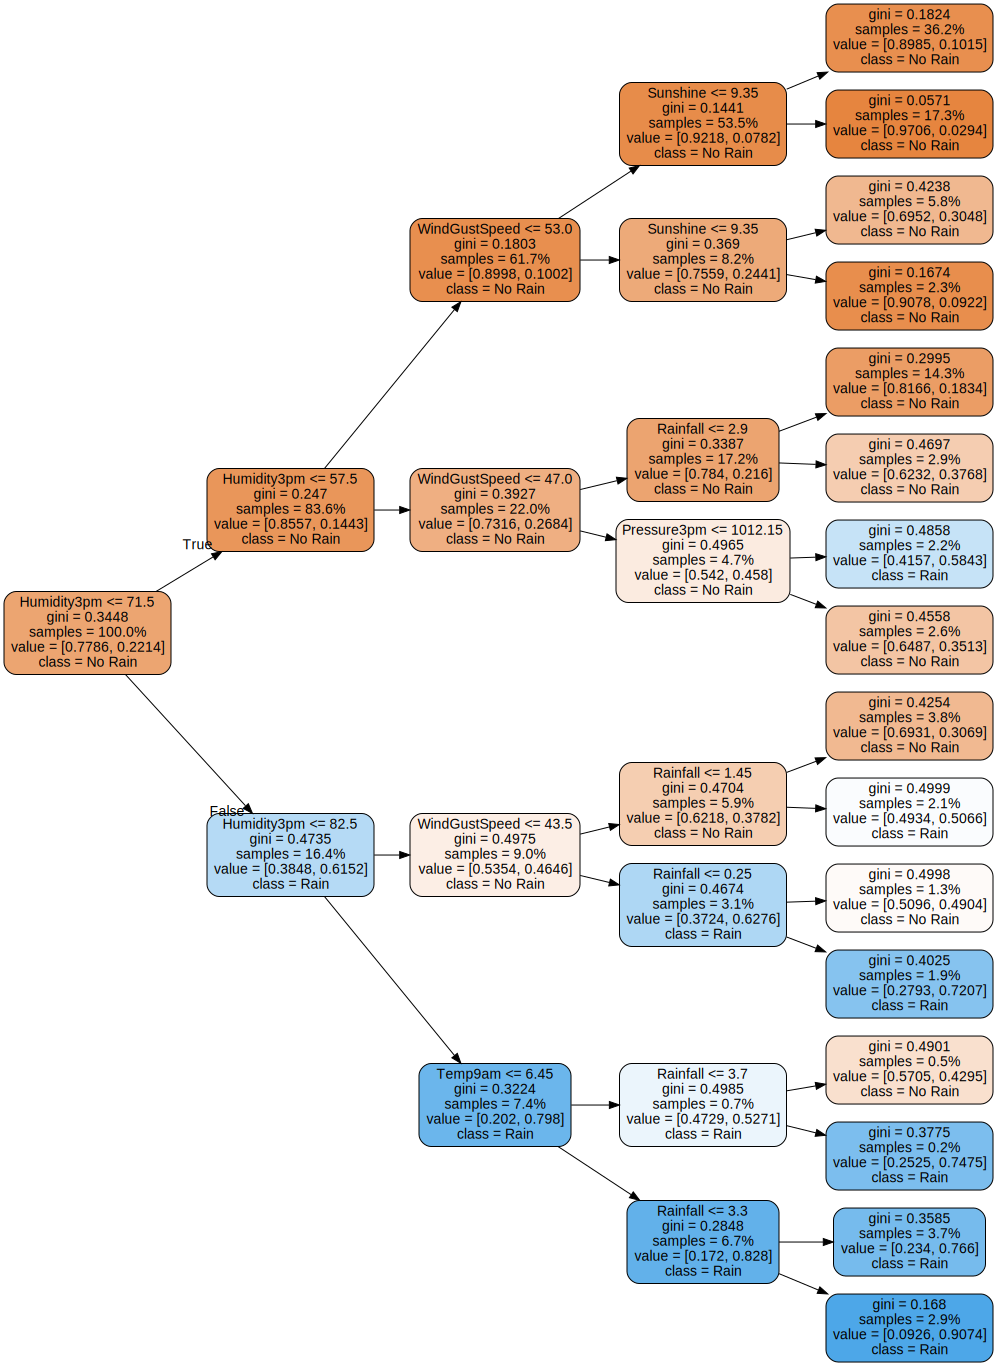

In [108]:
dot_data = export_graphviz(
                        decision_tree = dt,
                        # out_file=None,
                        # max_depth=None,
                        feature_names=X_test.columns,
                        class_names=['No Rain', 'Rain'],
                        # label='all',
                        filled=True,
                        # leaves_parallel=False,
                        impurity=True,
                        # node_ids=False,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        # special_characters=False,
                        precision=4,
                        )

graph = graphviz.Source(dot_data)
graph

De la lectura del árbol se ve que la variable más relevante es Humidity3pm. Cuando toma valores mayores a 72.5, la probabilidad de lluvia pasa de un 22,3% a un 63,0%, y esto aplica para el 15,5% de los ejemplos. Si es mayor a 82,5%, la probabilidad pasa al 79,7%. 

Podemos hacer un análisis unidimensional de esta variable con las técnicas que hemos visto antes. 

In [109]:
df_humidity3pm_not_null = df[df['Humidity3pm'] >= 0]

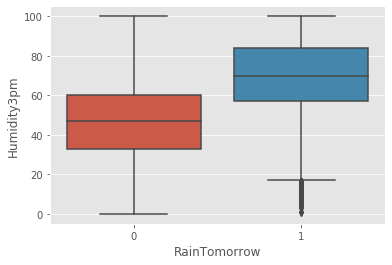

In [110]:
sns.boxplot(data=df_humidity3pm_not_null, x='RainTomorrow', y='Humidity3pm', )

### MLC4.3: Model evaluation

#### Opción 1: a través de los resultados

In [111]:
y_test_pred = pd.DataFrame(dt.predict(X_test), index=y_test.index, columns=['RainPrediction'])

In [112]:
y_test_pred.head()

,RainPrediction
137932,0
101620,0
130405,1
21860,0
117718,0


In [113]:
results_df = y_test.join(y_test_pred)

In [114]:
results_df.head()

,RainTomorrow,RainPrediction
137932,1,0
101620,0,0
130405,1,1
21860,0,0
117718,0,0


In [115]:
results_df['Success'] = (results_df['RainTomorrow'] == results_df['RainPrediction']).astype(int)

In [116]:
results_df.head()

,RainTomorrow,RainPrediction,Success
137932,1,0,0
101620,0,0,1
130405,1,1,1
21860,0,0,1
117718,0,0,1


In [117]:
results_df['Success'].count()

37406

In [118]:
results_df['Success'].sum()

31175

In [119]:
results_df['Success'].mean()

0.8334224455969631

In [120]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_df['Success'].sum(), results_df['Success'].count(), results_df['Success'].mean()))

Hemos acertado 31175 registros de un total de 37406, por tanto el Accuracy es 0.8334224455969631.


#### Opción 2: a través de la matriz de confusión

In [121]:
confusion_matrix = pd.crosstab(results_df['RainTomorrow'], results_df['RainPrediction'])

In [122]:
confusion_matrix

RainPrediction,0,1
RainTomorrow,,
0,27662,1374
1,4857,3513


In [123]:
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]

In [124]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.8334224455969631

#### Opción 3: Usando el módulo metrics

In [125]:
metrics.accuracy_score(results_df['RainTomorrow'], results_df['RainPrediction'])

0.8334224455969631

#### Opción 4: Usando el modelo

In [126]:
dt.score(X_test, y_test)

0.8334224455969631

Normalmente, usaremos esta forma (el score del modelo) por comodidad, pero es bueno ser capaces de generar los distintos métodos para obtener la puntuación para ver otros casos (por ejemplo, que tal han validado las días según mes) (No somos Noob, somos Pro). 

#### Validación por mes

In [127]:
results_df['Year'] = X_test['Year']

In [128]:
results_df['Month'] = X_test['Month']

In [129]:
results_df.head()

,RainTomorrow,RainPrediction,Success,Year,Month
137932,1,0,0,2014,4
101620,0,0,1,2013,10
130405,1,1,1,2010,5
21860,0,0,1,2012,6
117718,0,0,1,2008,7


In [130]:
results_df.pivot_table(index=['Year', 'Month'], values='Success', aggfunc=[len, sum, np.mean])

len     sum    mean
           Success Success Success
Year Month                        
2007 11          9       4    0.44
     12         10      10    1.00
2008 1           8       5    0.62
     2          16      12    0.75
     3          19      17    0.89
     4          18      14    0.78
     5          20      16    0.80
     6          17      16    0.94
     7          70      54    0.77
     8          76      64    0.84
     9          61      57    0.93
     10         61      54    0.89
     11         59      47    0.80
     12        237     179    0.76
2009 1         406     355    0.87
     2         371     317    0.85
     3         415     353    0.85
     4         402     349    0.87
     5         432     366    0.85
     6         438     345    0.79
     7         416     348    0.84
     8         424     333    0.79
     9         422     344    0.82
     10        415     340    0.82
     11        409     341    0.83
     12        392     340    0.87
2010 1         405     349    0.86
     2         357     300    0.84
     3         431     373    0.87
     4         429     360    0.84
     5         424     352    0.83
     6         393     345    0.88
     7         417     338    0.81
     8         412     329    0.80
     9         423     344    0.81
     10        421     338    0.80
     11        425     353    0.83
     12        410     335    0.82
2011 1         434     359    0.83
     2         392     333    0.85
     3         401     328    0.82
     5         438     363    0.83
     6         379     312    0.82
     7         439     367    0.84
     8         442     362    0.82
     9         391     320    0.82
     10        414     328    0.79
     11        429     333    0.78
     12        417     344    0.82
2012 1         435     350    0.80
     2         399     322    0.81
     3         414     350    0.85
     4         403     337    0.84
     5         392     340    0.87
     6         412     318    0.77
     7         403     327    0.81
     8         410     341    0.83
     9         409     339    0.83
     10        420     370    0.88
     11        422     352    0.83
2013 1         387     317    0.82
     3         453     374    0.83
     4         429     376    0.88
     5         455     375    0.82
     6         435     348    0.80
     7         446     364    0.82
     8         440     363    0.82
     9         424     341    0.80
     10        470     415    0.88
     11        424     354    0.83
     12        423     365    0.86
2014 1         460     416    0.90
     2         441     380    0.86
     3         444     378    0.85
     4         427     356    0.83
     5         428     346    0.81
     6         406     331    0.82
     7         427     347    0.81
     8         417     354    0.85
     9         432     365    0.84
     10        431     371    0.86
     11        451     384    0.85
     12        441     361    0.82
2015 1         462     388    0.84
     2         377     327    0.87
     3         433     366    0.85
     4         430     360    0.84
     5         450     373    0.83
     6         447     371    0.83
     7         434     348    0.80
     8         463     378    0.82
     9         413     341    0.83
     10        455     402    0.88
     11        405     355    0.88
     12        425     361    0.85
2017 1         472     398    0.84
     2         413     332    0.80
     3         433     352    0.81
     4         438     377    0.86
     5         461     386    0.84
     6         339     288    0.85

#### Otro elemento interesante es evaluar el modelo de forma probabilista, obteniendo los scorings y no el valor de predicción

In [131]:
y_score = pd.DataFrame(dt.predict_proba(X_test)[:,1], index=y_test.index, columns=['RainScore'])

In [132]:
results_df = results_df.join(y_score)

In [133]:
results_df.head(10)

,RainTomorrow,RainPrediction,Success,Year,Month,RainScore
137932,1,0,0,2014,4,0.38
101620,0,0,1,2013,10,0.03
130405,1,1,1,2010,5,0.91
21860,0,0,1,2012,6,0.18
117718,0,0,1,2008,7,0.38
21880,0,0,1,2012,7,0.10
119294,0,0,1,2013,1,0.03
104844,0,0,1,2014,5,0.10
10899,1,0,0,2014,9,0.38
7475,0,0,1,2013,6,0.10


In [134]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37406 entries, 137932 to 9654
Data columns (total 6 columns):
RainTomorrow      37406 non-null int64
RainPrediction    37406 non-null int64
Success           37406 non-null int64
Year              37406 non-null int64
Month             37406 non-null int64
RainScore         37406 non-null float64
dtypes: float64(1), int64(5)
memory usage: 3.2 MB


In [135]:
results_df.pivot_table(index='RainScore', values='Success', aggfunc=[len, sum, np.mean])

,len,sum,mean
,Success,Success,Success
RainScore,,,
0.03,6346,6177,0.97
0.09,900,816,0.91
0.10,13348,11967,0.90
0.18,5351,4386,0.82
0.30,2312,1641,0.71
0.31,1480,997,0.67
0.35,912,559,0.61
0.38,1112,733,0.66


In [136]:
results_by_score = results_df.pivot_table(index='RainScore', values='Success', aggfunc=[len, sum, np.mean])

In [137]:
results_by_score.columns = ['Count', 'Sum', 'Mean']

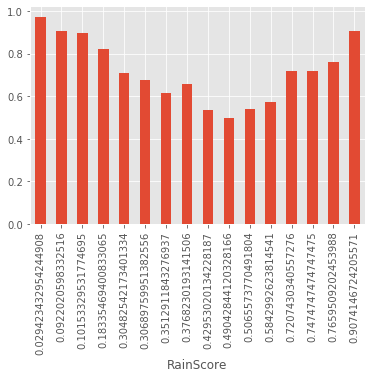

In [138]:
results_by_score['Mean'].plot(kind='bar')

#### Prueba de diversas estrategias de validación

Vamos a probar distintas estrategias de parámetros

In [139]:
for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)
    dt.fit(X_train, y_train)
    train_accuracy = dt.score(X_train, y_train)
    test_accuracy = dt.score(X_test, y_test)
    print('Profundidad del árbol: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))

Profundidad del árbol: 1. Train: 0.8163017449787463 - Test: 0.8162594236218789
Profundidad del árbol: 2. Train: 0.8226606629315185 - Test: 0.8203229428433941
Profundidad del árbol: 3. Train: 0.8305892597302902 - Test: 0.8282895792118912
Profundidad del árbol: 4. Train: 0.8354930739353109 - Test: 0.8334224455969631
Profundidad del árbol: 5. Train: 0.8392740521774997 - Test: 0.835347270491365
Profundidad del árbol: 6. Train: 0.8432039780474112 - Test: 0.8399989306528365
Profundidad del árbol: 7. Train: 0.8490702230777163 - Test: 0.8407207399882372
Profundidad del árbol: 8. Train: 0.8531605540851751 - Test: 0.8425653638453724
Profundidad del árbol: 9. Train: 0.8601152625488376 - Test: 0.8405068705555259
Profundidad del árbol: 10. Train: 0.8680896893869087 - Test: 0.839490990750147
Profundidad del árbol: 11. Train: 0.878389990719417 - Test: 0.8367106881248998
Profundidad del árbol: 12. Train: 0.8898245855245821 - Test: 0.8354274715286317
Profundidad del árbol: 13. Train: 0.9013622979181705

En este ejemplo, podemos ver claramente como el árbol hace Overfit a medida que incrementamos la profundidad, y es por este motivo que tendremos que recurrir a mecanismos de **poda**

In [140]:
DecisionTreeClassifier??

#### Vamos a probar con algún parámetro para ver como modifican el sobreajuste.


In [141]:
for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42, min_samples_split=500)
    dt.fit(X_train, y_train)
    train_accuracy = dt.score(X_train, y_train)
    test_accuracy = dt.score(X_test, y_test)
    print('Profundidad del árbol: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))

Profundidad del árbol: 1. Train: 0.8163017449787463 - Test: 0.8162594236218789
Profundidad del árbol: 2. Train: 0.8226606629315185 - Test: 0.8203229428433941
Profundidad del árbol: 3. Train: 0.8305892597302902 - Test: 0.8282895792118912
Profundidad del árbol: 4. Train: 0.8354930739353109 - Test: 0.8334224455969631
Profundidad del árbol: 5. Train: 0.838827209294332 - Test: 0.8349462653050312
Profundidad del árbol: 6. Train: 0.8424363248891485 - Test: 0.8398652622573919
Profundidad del árbol: 7. Train: 0.8455527675614982 - Test: 0.8400523980110143
Profundidad del árbol: 8. Train: 0.8459652379151915 - Test: 0.840480136876437
Profundidad del árbol: 9. Train: 0.8465724859359067 - Test: 0.840747473667326
Profundidad del árbol: 10. Train: 0.8467672636029285 - Test: 0.8400523980110143
Profundidad del árbol: 11. Train: 0.8470651588583737 - Test: 0.839838528578303
Profundidad del árbol: 12. Train: 0.8472713940352203 - Test: 0.839490990750147
Profundidad del árbol: 13. Train: 0.8473057665646948 -

#### Podemos medir la efectividad en el conjunto de validación del mejor estimador

In [142]:
dt = DecisionTreeClassifier(max_depth=7, random_state=42, min_samples_split=500)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [143]:
dt.score(X_train, y_train)

0.8455527675614982

In [144]:
dt.score(X_test, y_test)

0.8400523980110143

In [145]:
dt.score(val_df_X, val_df_y)

0.8275074251770619

#### Podemos evaluar otras opciones de métrica como el F1

In [146]:
confusion_matrix

RainPrediction,0,1
RainTomorrow,,
0,27662,1374
1,4857,3513


In [147]:
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

In [148]:
f1_score = 2 / ( 1/Precision + 1/Recall )

In [149]:
f1_score

0.5299841593120616

In [150]:
metrics.f1_score(y_test, y_test_pred)

0.5299841593120616

#### O la curva de ROC

In [151]:
print(metrics.roc_auc_score(results_df['RainTomorrow'], results_df['RainScore']))

0.8151020864306708


In [152]:
fpr, tpr, _ = metrics.roc_curve(results_df['RainTomorrow'], results_df['RainScore'])

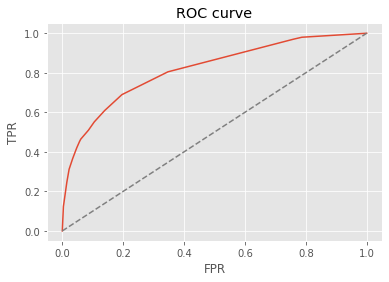

In [153]:
plt.clf()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

#### Podemos probar el k-fold como estrategia de validación

In [154]:
kf = model_selection.KFold(n_splits=10, random_state=42, shuffle=False)

In [155]:
scores_list = []
for train_index, test_index in kf.split(dev_df):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = dev_df_X.iloc[train_index], dev_df_X.iloc[test_index]
    y_train, y_test = dev_df_y.iloc[train_index], dev_df_y.iloc[test_index]
    dt = DecisionTreeClassifier(max_depth=4, random_state=42)
    dt.fit(X_train, y_train)
    _score = dt.score(X_test, y_test)
    scores_list.append(_score)
    #print(_scores)
scores_list

[0.8614965113481434,
 0.8087256395861737,
 0.8249258160237388,
 0.809688026305237,
 0.839361616809688,
 0.8135226179018287,
 0.8198588386268848,
 0.8384664741738852,
 0.8479307025986526,
 0.8680622393326917]

In [156]:
np.mean(scores_list)

0.8332038482706924

In [157]:
np.std(scores_list)

0.020209449044544085

In [158]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)

In [159]:
scores = model_selection.cross_val_score(dt, dev_df_X, dev_df_y, cv=kf)

In [160]:
scores

array([0.86149651, 0.80872564, 0.82492582, 0.80968803, 0.83936162,
       0.81352262, 0.81985884, 0.83846647, 0.8479307 , 0.86806224])

In [161]:
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.833 (+/- 0.040)


### Evaluación de modelos alternativos

Una alternativa al uso de árboles de decisión que aporta mayor precisión sin perjudicar la capacidad de generalización son los modelos de Ensamble, como Random Forest o Gradient Boosting

In [226]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [227]:
RandomForestClassifier??

In [228]:
rf = RandomForestClassifier(n_estimators=3, max_depth=3, random_state=42)

In [229]:
rf.fit(
    X=X_train, 
    y=np.ravel(y_train)
)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

El Random Forest genera un listado de estimadores (los modelos de base) consultable, de manera que podemos trabajar con cada uno de éstos como si se tratase de un modelo independiente.

In [230]:
tree_list = rf.estimators_

In [231]:
tree_list

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1608637542, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1273642419, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                        max_features='auto', max_leaf_nodes=None,
                        mi

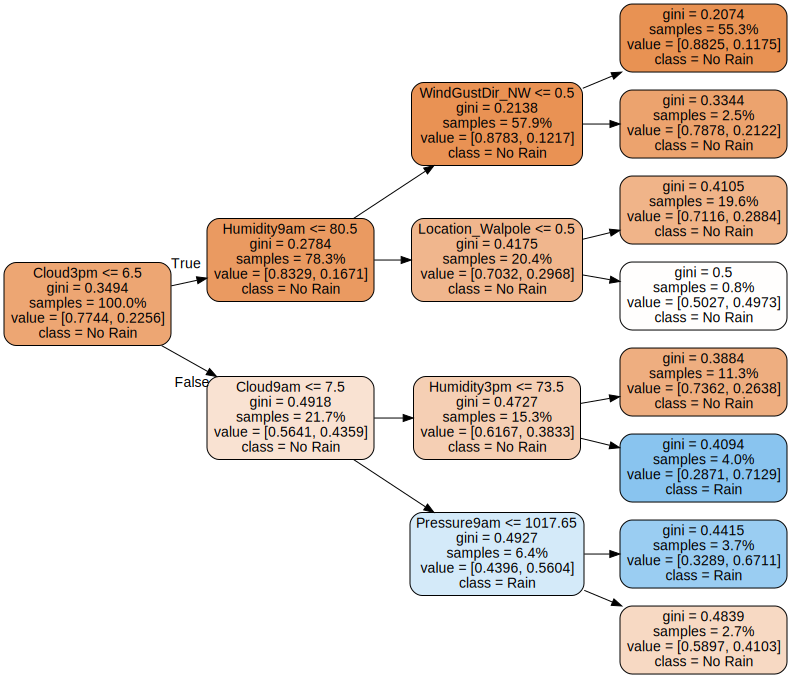

<Figure size 576x576 with 0 Axes>

In [232]:
plt.figure(figsize=(8,8))
dot_data = export_graphviz(
                        decision_tree = tree_list[0],
                        feature_names=X_test.columns,
                        class_names=['No Rain', 'Rain'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4,
                        )

graph = graphviz.Source(dot_data)
graph

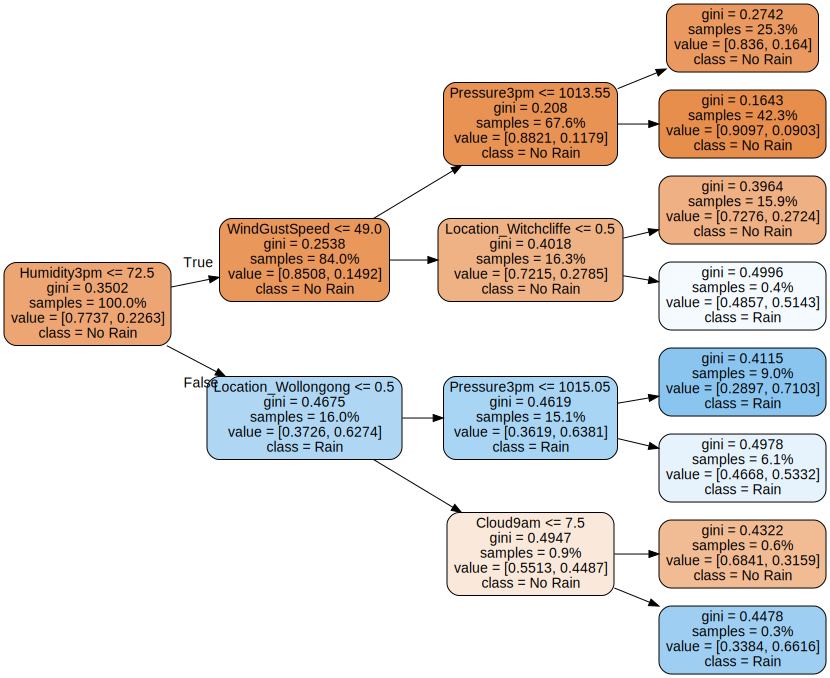

In [233]:
dot_data = export_graphviz(
                        decision_tree = tree_list[1],
                        feature_names=X_test.columns,
                        class_names=['No Rain', 'Rain'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4,
                        )

graph = graphviz.Source(dot_data)
graph

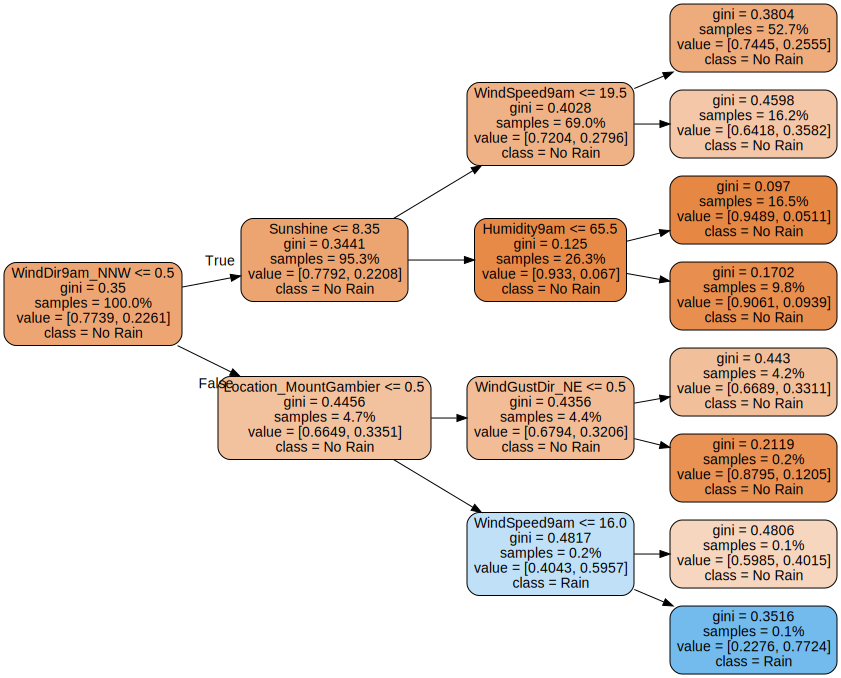

In [234]:
dot_data = export_graphviz(
                        decision_tree = tree_list[2],
                        feature_names=X_test.columns,
                        class_names=['No Rain', 'Rain'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4,
                        )

graph = graphviz.Source(dot_data)
graph

Una alternativa a la visualización de importancia de atributos es el Feature Importance, que promedia el Information Gain del predictor en todo el ensamble. 

In [235]:
top_features = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)

In [236]:
top_features

Humidity3pm             0.35
Sunshine                0.26
Cloud3pm                0.16
Humidity9am             0.06
WindSpeed9am            0.04
WindGustSpeed           0.03
Cloud9am                0.02
Pressure3pm             0.02
WindDir9am_NNW          0.02
Pressure9am             0.01
Location_MountGambier   0.01
Location_Walpole        0.00
WindGustDir_NE          0.00
WindGustDir_NW          0.00
Location_Wollongong     0.00
Location_Witchcliffe    0.00
WindDir9am_E            0.00
WindDir9am_-999         0.00
WindGustDir_WSW         0.00
WindDir9am_ENE          0.00
dtype: float64

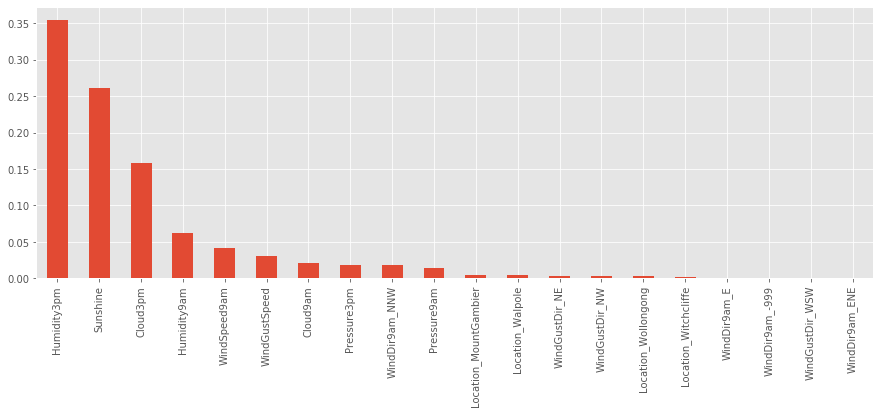

In [237]:
plt.figure(figsize=(15,5))
top_features.plot(kind='bar')

Podemos comprobar que la precisión obtenida por el RF es superior a la del árbol individual. 

In [241]:
rf = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=500, random_state=42)
rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [248]:
y_score = pd.DataFrame(rf.predict_proba(X_test)[:,1], index=y_test.index, columns=['RainScore'])

In [249]:
results_df = y_test.join(y_score)

In [252]:
results_df.head(10)

,RainTomorrow,RainScore
127545,0,0.11
127546,0,0.06
127547,0,0.10
127548,0,0.06
127549,1,0.19
127550,1,0.68
127551,1,0.68
127552,0,0.24
127553,1,0.42
127554,0,0.36


In [251]:
print(metrics.roc_auc_score(results_df['RainTomorrow'], results_df['RainScore']))

0.8849375718744514


In [286]:
fpr, tpr, _ = metrics.roc_curve(results_df['RainTomorrow'], results_df['RainScore'])

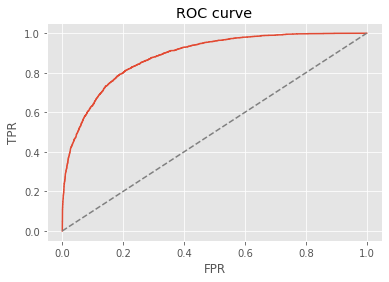

In [287]:
plt.clf()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

Un aspecto importante a tener en cuenta es que el valor de score obtenido es un valor CONTINUO, por lo que deberemos trabajar con deciles. 

In [253]:
results_df['RainScore'].nunique()

12466

In [254]:
pd.qcut?

In [255]:
results_df['Decile'] = pd.qcut(results_df['RainScore'], q=10)

In [256]:
results_df.head(10)

,RainTomorrow,RainScore,Decile
127545,0,0.11,"(0.0971, 0.116]"
127546,0,0.06,"(0.0458, 0.0778]"
127547,0,0.10,"(0.0971, 0.116]"
127548,0,0.06,"(0.0458, 0.0778]"
127549,1,0.19,"(0.162, 0.196]"
127550,1,0.68,"(0.43, 0.764]"
127551,1,0.68,"(0.43, 0.764]"
127552,0,0.24,"(0.196, 0.242]"
127553,1,0.42,"(0.311, 0.43]"
127554,0,0.36,"(0.311, 0.43]"


In [268]:
results_summary_table = results_df.pivot_table(index='Decile', values='RainTomorrow', aggfunc=[len, np.sum, np.mean]).sort_index(ascending=False)

In [269]:
results_summary_table

,len,sum,mean
,RainTomorrow,RainTomorrow,RainTomorrow
Decile,,,
"(0.43, 0.764]",1247,962,0.77
"(0.311, 0.43]",1247,506,0.41
"(0.242, 0.311]",1247,351,0.28
"(0.196, 0.242]",1246,194,0.16
"(0.162, 0.196]",1247,122,0.10
"(0.136, 0.162]",1247,80,0.06
"(0.116, 0.136]",1246,46,0.04
"(0.0971, 0.116]",1247,26,0.02


In [270]:
results_summary_table.columns = ['Cases', 'Responses', 'Accuracy']

In [271]:
results_summary_table

,Cases,Responses,Accuracy
Decile,,,
"(0.43, 0.764]",1247,962,0.77
"(0.311, 0.43]",1247,506,0.41
"(0.242, 0.311]",1247,351,0.28
"(0.196, 0.242]",1246,194,0.16
"(0.162, 0.196]",1247,122,0.10
"(0.136, 0.162]",1247,80,0.06
"(0.116, 0.136]",1246,46,0.04
"(0.0971, 0.116]",1247,26,0.02
"(0.0778, 0.0971]",1247,7,0.01


In [277]:
results_summary_table['Pct. Cases'] = results_summary_table['Cases'] / results_summary_table['Cases'].sum()
results_summary_table['Pct. Responses'] = results_summary_table['Responses'] / results_summary_table['Responses'].sum()

In [278]:
results_summary_table

,Cases,Responses,Accuracy,Cum. Cases,Cum. Responses,Pct. Cases,Pct. Responses
Decile,,,,,,,
"(0.43, 0.764]",1247,962,0.77,1247,962,0.10,0.42
"(0.311, 0.43]",1247,506,0.41,2494,1468,0.10,0.22
"(0.242, 0.311]",1247,351,0.28,3741,1819,0.10,0.15
"(0.196, 0.242]",1246,194,0.16,4987,2013,0.10,0.08
"(0.162, 0.196]",1247,122,0.10,6234,2135,0.10,0.05
"(0.136, 0.162]",1247,80,0.06,7481,2215,0.10,0.03
"(0.116, 0.136]",1246,46,0.04,8727,2261,0.10,0.02
"(0.0971, 0.116]",1247,26,0.02,9974,2287,0.10,0.01
"(0.0778, 0.0971]",1247,7,0.01,11221,2294,0.10,0.00


In [279]:
results_summary_table['Cum. Cases'] = results_summary_table['Cases'].cumsum()
results_summary_table['Cum. Responses'] = results_summary_table['Responses'].cumsum()

In [280]:
results_summary_table

,Cases,Responses,Accuracy,Cum. Cases,Cum. Responses,Pct. Cases,Pct. Responses
Decile,,,,,,,
"(0.43, 0.764]",1247,962,0.77,1247,962,0.10,0.42
"(0.311, 0.43]",1247,506,0.41,2494,1468,0.10,0.22
"(0.242, 0.311]",1247,351,0.28,3741,1819,0.10,0.15
"(0.196, 0.242]",1246,194,0.16,4987,2013,0.10,0.08
"(0.162, 0.196]",1247,122,0.10,6234,2135,0.10,0.05
"(0.136, 0.162]",1247,80,0.06,7481,2215,0.10,0.03
"(0.116, 0.136]",1246,46,0.04,8727,2261,0.10,0.02
"(0.0971, 0.116]",1247,26,0.02,9974,2287,0.10,0.01
"(0.0778, 0.0971]",1247,7,0.01,11221,2294,0.10,0.00


In [281]:
results_summary_table['Cum. Pct. Cases'] = results_summary_table['Pct. Cases'].cumsum()
results_summary_table['Cum. Pct. Responses'] = results_summary_table['Pct. Responses'].cumsum()

In [282]:
results_summary_table

,Cases,Responses,Accuracy,Cum. Cases,Cum. Responses,Pct. Cases,Pct. Responses,Cum. Pct. Cases,Cum. Pct. Responses
Decile,,,,,,,,,
"(0.43, 0.764]",1247,962,0.77,1247,962,0.10,0.42,0.10,0.42
"(0.311, 0.43]",1247,506,0.41,2494,1468,0.10,0.22,0.20,0.64
"(0.242, 0.311]",1247,351,0.28,3741,1819,0.10,0.15,0.30,0.79
"(0.196, 0.242]",1246,194,0.16,4987,2013,0.10,0.08,0.40,0.88
"(0.162, 0.196]",1247,122,0.10,6234,2135,0.10,0.05,0.50,0.93
"(0.136, 0.162]",1247,80,0.06,7481,2215,0.10,0.03,0.60,0.96
"(0.116, 0.136]",1246,46,0.04,8727,2261,0.10,0.02,0.70,0.98
"(0.0971, 0.116]",1247,26,0.02,9974,2287,0.10,0.01,0.80,1.00
"(0.0778, 0.0971]",1247,7,0.01,11221,2294,0.10,0.00,0.90,1.00


In [288]:
def get_gain_table(model, X_test, y_test):
    y_score = pd.DataFrame(model.predict_proba(X_test)[:,1], index=y_test.index, columns=['Score'])
    results_df = y_test.join(y_score)
    results_df['Decile'] = pd.qcut(results_df['Score'], q=10)
    results_summary_table = results_df.pivot_table(index='Decile', values=y_test.columns, aggfunc=[len, np.sum, np.mean]).sort_index(ascending=False)
    results_summary_table.columns = ['Cases', 'Responses', 'Accuracy']
    results_summary_table['Pct. Cases'] = results_summary_table['Cases'] / results_summary_table['Cases'].sum()
    results_summary_table['Pct. Responses'] = results_summary_table['Responses'] / results_summary_table['Responses'].sum()
    results_summary_table['Cum. Cases'] = results_summary_table['Cases'].cumsum()
    results_summary_table['Cum. Responses'] = results_summary_table['Responses'].cumsum()
    results_summary_table['Cum. Pct. Cases'] = results_summary_table['Pct. Cases'].cumsum()
    results_summary_table['Cum. Pct. Responses'] = results_summary_table['Pct. Responses'].cumsum()
    return results_summary_table

In [290]:
rf_results_summary_table = get_gain_table(rf, X_test, y_test)
rf_results_summary_table

,Cases,Responses,Accuracy,Pct. Cases,Pct. Responses,Cum. Cases,Cum. Responses,Cum. Pct. Cases,Cum. Pct. Responses
Decile,,,,,,,,,
"(0.43, 0.764]",1247,962,0.77,0.10,0.42,1247,962,0.10,0.42
"(0.311, 0.43]",1247,506,0.41,0.10,0.22,2494,1468,0.20,0.64
"(0.242, 0.311]",1247,351,0.28,0.10,0.15,3741,1819,0.30,0.79
"(0.196, 0.242]",1246,194,0.16,0.10,0.08,4987,2013,0.40,0.88
"(0.162, 0.196]",1247,122,0.10,0.10,0.05,6234,2135,0.50,0.93
"(0.136, 0.162]",1247,80,0.06,0.10,0.03,7481,2215,0.60,0.96
"(0.116, 0.136]",1246,46,0.04,0.10,0.02,8727,2261,0.70,0.98
"(0.0971, 0.116]",1247,26,0.02,0.10,0.01,9974,2287,0.80,1.00
"(0.0778, 0.0971]",1247,7,0.01,0.10,0.00,11221,2294,0.90,1.00


In [285]:
gb = GradientBoostingClassifier(n_estimators=50, max_depth=5, min_samples_split=500, random_state=42)
gb.fit(X_train, np.ravel(y_train))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=500,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [292]:
y_score = pd.DataFrame(gb.predict_proba(X_test)[:,1], index=y_test.index, columns=['RainScore'])

In [293]:
results_df = y_test.join(y_score)

In [294]:
print(metrics.roc_auc_score(results_df['RainTomorrow'], results_df['RainScore']))

0.9012403143511944


In [295]:
gb_results_summary_table = get_gain_table(gb, X_test, y_test)
gb_results_summary_table

,Cases,Responses,Accuracy,Pct. Cases,Pct. Responses,Cum. Cases,Cum. Responses,Cum. Pct. Cases,Cum. Pct. Responses
Decile,,,,,,,,,
"(0.638, 0.955]",1247,987,0.79,0.10,0.43,1247,987,0.10,0.43
"(0.365, 0.638]",1247,549,0.44,0.10,0.24,2494,1536,0.20,0.67
"(0.222, 0.365]",1247,338,0.27,0.10,0.15,3741,1874,0.30,0.82
"(0.149, 0.222]",1246,194,0.16,0.10,0.08,4987,2068,0.40,0.90
"(0.105, 0.149]",1247,116,0.09,0.10,0.05,6234,2184,0.50,0.95
"(0.0753, 0.105]",1247,53,0.04,0.10,0.02,7481,2237,0.60,0.97
"(0.0565, 0.0753]",1246,35,0.03,0.10,0.02,8727,2272,0.70,0.99
"(0.0423, 0.0565]",1247,15,0.01,0.10,0.01,9974,2287,0.80,1.00
"(0.0313, 0.0423]",1247,7,0.01,0.10,0.00,11221,2294,0.90,1.00


### Comparación de modelos

In [314]:
RANDOM_STATE = 42
n_estimators = 50
max_depth = 3

models = [ 
    ('DecisionTree', DecisionTreeClassifier(max_depth=max_depth, random_state=42)),
    ('RandomForest', RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=RANDOM_STATE)),
    ('GradientBoosting', GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=RANDOM_STATE))
]

ROC AUC Score for DecisionTree: 0.8135336550386734
ROC AUC Score for RandomForest: 0.8730707941650968
ROC AUC Score for GradientBoosting: 0.8951992328654967


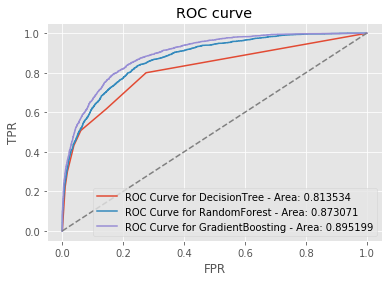

In [317]:
plt.clf()
for model in models:
    model_name = model[0]
    model_instance = model[1]
    model_instance.fit(X_train, np.ravel(y_train))
    predictions = model_instance.predict_proba(X_test)[:,1]
    auc_score = metrics.roc_auc_score(y_test, predictions)
    print('ROC AUC Score for {}: {}'.format(model_name, auc_score))
    fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
    plt.plot(fpr, tpr, label='ROC Curve for {} - Area: {:2f}'.format(model_name, auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()